# Matplotlib

Matplotlib è una libreria di Python che ci permette di rappresentare grafici 2D. https://matplotlib.org  
Per importarla usiamo: **`import matplotlib.pyplot as plt`**

Successivamente faremo anche esempi usando dati generati da NumPy, quindi importiamo subito entrambe le librerie.

In [1]:
import matplotlib.pyplot as plt
import numpy as np

## Grafico a partire da due liste create (quasi) manualmente

In [2]:
x = list(range(-10,11)) # generiamo una lista di un intervallo da -10 a +10
y = [n**2 for n in x] # creiamo una lista dei quadrati con una list comprehension

# stampiamo le due liste
print(x)
print(y)

[-10, -9, -8, -7, -6, -5, -4, -3, -2, -1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
[100, 81, 64, 49, 36, 25, 16, 9, 4, 1, 0, 1, 4, 9, 16, 25, 36, 49, 64, 81, 100]


Usiamo **`plt.plot()`** per generare il grafico, e **`plt.show()`** per visualizzarlo.

In [3]:
help(plt.plot)

Help on function plot in module matplotlib.pyplot:

plot(*args, **kwargs)
    Plot lines and/or markers to the
    :class:`~matplotlib.axes.Axes`.  *args* is a variable length
    argument, allowing for multiple *x*, *y* pairs with an
    optional format string.  For example, each of the following is
    legal::
    
        plot(x, y)        # plot x and y using default line style and color
        plot(x, y, 'bo')  # plot x and y using blue circle markers
        plot(y)           # plot y using x as index array 0..N-1
        plot(y, 'r+')     # ditto, but with red plusses
    
    If *x* and/or *y* is 2-dimensional, then the corresponding columns
    will be plotted.
    
    If used with labeled data, make sure that the color spec is not
    included as an element in data, as otherwise the last case
    ``plot("v","r", data={"v":..., "r":...)``
    can be interpreted as the first case which would do ``plot(v, r)``
    using the default line style and color.
    
    If not used wi

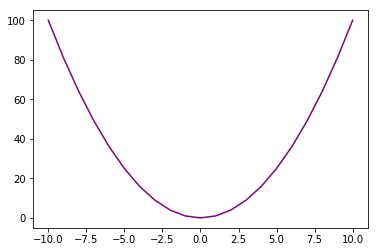

In [4]:
plt.plot(x, y, 'purple')
plt.show()

### Aggiungiamo una descrizione del grafico e dei due assi.

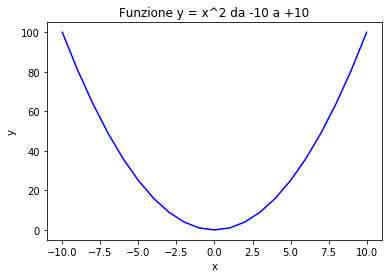

In [5]:
plt.plot(x, y, 'blue')

plt.title('Funzione y = x^2 da -10 a +10') # titolo

plt.xlabel('x') # etichetta per asse x
plt.ylabel('y') # etichetta per asse y

plt.show()

## Due curve sullo stesso grafico.

Colori disponibili https://matplotlib.org/examples/color/named_colors.html

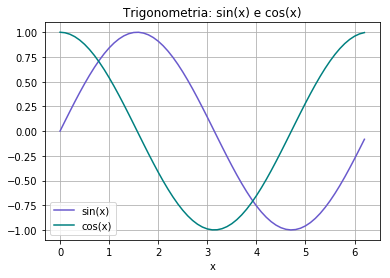

In [6]:
# Utilizziamo NumPy per generare i punti
x = np.arange(0, np.pi*2, 0.1) 
y_sin = np.sin(x)
y_cos = np.cos(x)

plt.plot(x, y_sin,'slateblue', label="sin(x)")
plt.plot(x, y_cos,'teal', label="cos(x)")

# Descrizione del grafico e asse x
plt.title('Trigonometria: sin(x) e cos(x)')
plt.xlabel('x')

# Creiamo una legenda
plt.legend() 

# Mostro entrambe le griglie x e y
plt.grid(True, which='both') 

plt.show()

## Approfondimenti

Tricks e soluzioni da dubbi emersi durante il corso.

**Valori infiniti**
Per ovviare alla rappresentazioni di valori che tendono all'infinito possiamo arribuire un valore nullo a valori di y al di sopra di una certa soglia.

**Assi cartesiani**
Per enfatizzare l'asse x=0 possiamo usare **`plt.axvline(x=0)`**. Idem per l'asse y.

/Users/stefania/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in less
  if __name__ == '__main__':


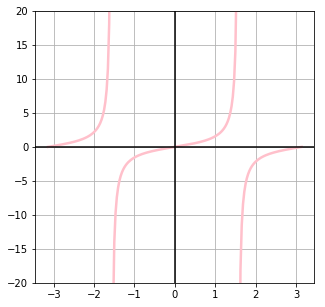

In [7]:
#  Definiamo le variabili
x = np.linspace(-np.pi, np.pi, 200)
y = np.tan(x)

# Definiamo un massimo per ovviare al problema della rappresentazione di valori che tendono all'infinito
# ciò potrebbe genrare un warning (barra rossa, un warning non è un errore)
close_to_inf = 80 
y[y > close_to_inf] = np.nan
y[y < -close_to_inf] = np.nan

# Creiamo il grafico
plt.figure(figsize=(5,5)) # per stabilire la dimenzione del grafico, approfondiemnto nella seconda parte di Matplotlib
plt.plot(x, y, color="pink", linewidth=2.5, linestyle="-")

# Limite delle y
max_value = 20
plt.ylim(-max_value, max_value)

# Mostriamo entrambe le griglie x e y
plt.grid(True, which='both') 

# Enfatizziamo i due assi x=0 e y = 0
plt.axvline(x=0, color='k')
plt.axhline(y=0, color='k')

plt.show()

## Appendice: SciPy e distribuzioni

SciPy è una libreria Python ricca di pacchetti per la computazione scientifica come algebra lineare e strumenti di interpolazione, algoritmi per le trasformate di Fourier, e in particolare anche funzioni statistiche (`scipy.stats`).

Vediamo qui un esempio di come generare un istogramma e confrontare due distribuzioni che lo 'fittino' al meglio.
Approfondiremo SciPy nel modulo di Data Mining.

Questo è l'elenco di tutte le distribuzioni confenute in `scipy.stats`:  
https://docs.scipy.org/doc/scipy/reference/stats.html#continuous-distributions

In [8]:
# Non importiamo matplotlib.pyplot perché l'abbiamo già importata sopra

import numpy as np
import scipy.stats as stats

### Distribuzione normale

Libreria SciPy:  
https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.norm.html#scipy.stats.norm

Approfondimenti: https://it.wikipedia.org/wiki/Distribuzione_normale

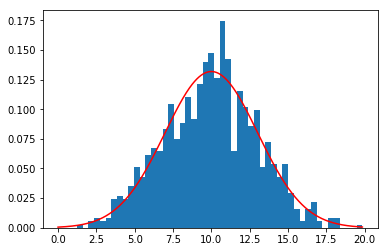

In [9]:
normal = stats.norm

y = normal.rvs(10, scale=3, size=1000)
x = np.linspace(0, y.max(), 1000)

# Creatiamo la curva
param = normal.fit(y, floc=10)
pdf_fitted = normal.pdf(x, *param)
plt.plot(x, pdf_fitted, color='r')

# Disegnamo l'istogramma
plt.hist(y, normed=True, bins=50)

plt.show()

### Distribuzione Weibull (minimum continuous random variable)

Libreria di SciPy:  
https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.weibull_min.html#scipy.stats.weibull_min  

Appronfondimenti: https://it.wikipedia.org/wiki/Distribuzione_di_Weibull  

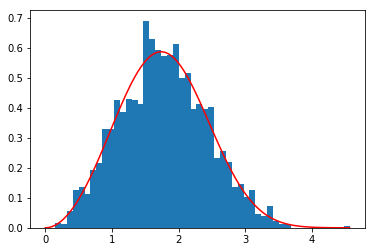

In [10]:
weibull = stats.weibull_min

y = weibull.rvs(3, loc=0, scale=2, size=2000)

x = np.linspace(0, y.max(), 100)

# Creatiamo la curva
param = weibull.fit(y, floc=0)
pdf_fitted = weibull.pdf(x, *param)
plt.plot(x, pdf_fitted, color='r')

# Disegnamo l'istogramma
plt.hist(y, normed=True, bins=50)

plt.show()

### Distribuzione Gamma

Libreria SciPy:  
https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.gamma.html#scipy.stats.gamma  

Approfondiemnti: https://it.wikipedia.org/wiki/Distribuzione_Gamma

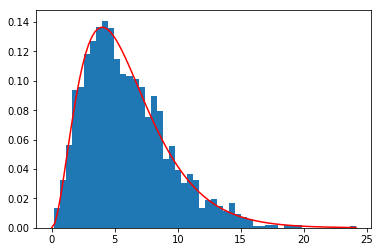

In [11]:
gamma = stats.gamma

y = gamma.rvs(3, loc=0, scale=2, size=2000)
x = np.linspace(0, y.max(), 100)

# Creatiamo la curva
param = gamma.fit(y, floc=0)
pdf_fitted = gamma.pdf(x, *param)
plt.plot(x, pdf_fitted, color='r')

# Disegnamo l'istogramma
plt.hist(y, normed=True, bins=50)

plt.show()